In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyextremes import EVA

print("Todos los paquetes importados correctamente")


Todos los paquetes importados correctamente


In [2]:
station = 1330
# We create some random continuous time series with some extremes
flowdata = pd.read_csv(f"../../../Status_Outlook_Bulletin/stations/data/{station}.csv",parse_dates=['Fecha'],index_col="Fecha",dayfirst=True,na_values="NA")
# Convertir el índice a datetime por si acaso
flowdata.index = pd.to_datetime(flowdata.index, dayfirst=True)
diff = pd.date_range(start = flowdata.index[0].strftime('%Y-%m-%d'), end = flowdata.index[-1].strftime('%Y-%m-%d'),freq='D')
# Re-index the dataframe based on the missind date variable
flowdata = flowdata.reindex(diff,fill_value=None)
# Set index Fecha
flowdata.index.name = 'Fecha'
flowdata = flowdata.rename_axis("date")
# Change columns names
flowdata.columns = ['flow']

#month and year column
flowdata['month'] = flowdata.index.month
flowdata['year'] = flowdata.index.year
flowdata = flowdata.reset_index()

#check whether or not there is enough data? 
print(station)
print(f"There are {flowdata['year'].max() - flowdata['year'].min()} years of data in this file.")
print(f"There are {sum(flowdata['flow'].isnull())} missing data points, which is {np.round(sum(flowdata['flow'].isnull())/len(flowdata) * 100,2)}% of the total data")

1330
There are 45 years of data in this file.
There are 1427 missing data points, which is 8.63% of the total data


In [3]:
flowdata.set_index('date', inplace=True)
# Create a time series (removing missing values in 'flow' column)
flowdata_ts = flowdata['flow'].dropna()
# Display the result
print(flowdata_ts)

date
1980-01-01    1.956
1980-01-02    1.956
1980-01-03    1.956
1980-01-04    1.956
1980-01-05    1.956
              ...  
2025-03-27    3.492
2025-03-28    3.848
2025-03-29    3.884
2025-03-30    2.952
2025-03-31    2.656
Name: flow, Length: 15100, dtype: float64


In [12]:
from pyextremes import get_extremes
extremes = get_extremes(
    ts=flowdata_ts,
    method="BM",
    block_size="365.2425D",
)
extremes.sort_values(ascending=False).head(6)

date
2024-03-22    3938.472
2019-06-18    3337.963
2016-04-19    2719.056
1983-09-29    2625.998
1986-08-10    2601.422
2017-08-28    2492.022
Name: flow, dtype: float64

In [4]:
model = EVA(flowdata_ts)

In [5]:
model.get_extremes(method="BM", block_size="365.2425D")

(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot: xlabel='date', ylabel='flow'>)

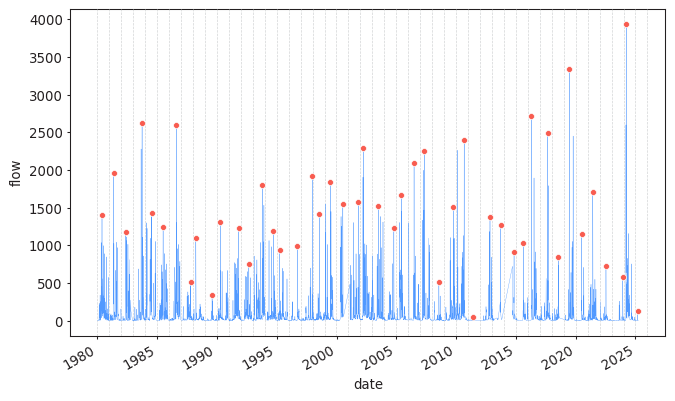

In [6]:
model.plot_extremes()

In [7]:
model.fit_model()
summary = model.get_summary(
    return_period=[2, 5, 10, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)
print(summary)

               return value     lower ci     upper ci
return period                                        
2.0             1367.252542  1152.818784  1584.117596
5.0             2124.454536  1786.401962  2436.479009
10.0            2625.788143  2197.574422  3021.493823
25.0            3259.224484  2688.317359  3733.763202
50.0            3729.143748  3053.233698  4271.246291
100.0           4195.593201  3420.798751  4815.368687
250.0           4809.750156  3887.263594  5542.917888
500.0           5273.486680  4241.715665  6104.551392
1000.0          5736.887916  4590.657282  6653.800793


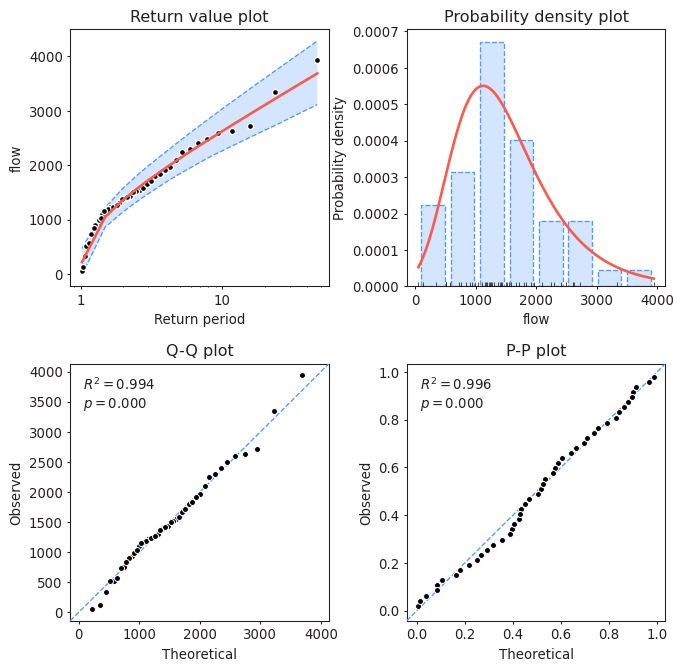

In [8]:
model.plot_diagnostic(alpha=0.95);
plt.show()

In [9]:
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                          flow      Size:                              15,100
Start:                       January 1980      End:                           March 2025
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 46      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               